In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/COVID/Covid_images_unn.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/COVID/Covid_masks_unn.npy')

In [3]:
X_test = images[2893:3616]
y_test = masks[2893:3616]

In [4]:
images = images[0:2893]
masks = masks[0:2893]

In [5]:
images.shape

(2893, 512, 512, 1)

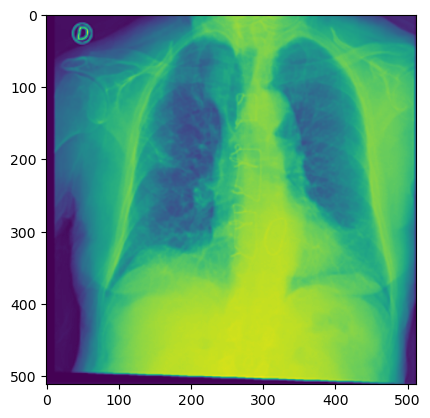

In [6]:
imshow(images[100])

In [7]:
masks.shape

(2893, 512, 512, 1)

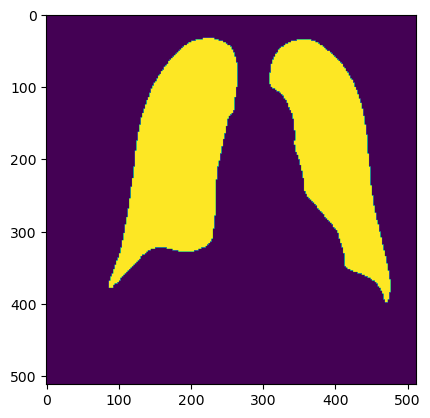

In [8]:
imshow(masks[100])

In [9]:
import sys
sys.path.append('../')
import gp2

In [10]:
from keras import losses

In [11]:
loss_fx = losses.BCE

In [12]:
C = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpofrf4l4wkuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpsvauyfmrkuc_unet2d


In [13]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmpsvauyfmrkuc_unet2d
Verbose mode active!


In [14]:
R.classifier = C ### use custom classifier

In [15]:
R.run(images, masks, runs=10, batch_size=16, shuffle=True, results_file='/raid/mpsych/OMAMA/GP2/results/kuc_unet2d_0kuc_unet2d_model_3_10_covid.pkl')

Shuffling data...
Weights OK!
******
Loop 1
Epoch 1/100
9/9 [==============================] - 17s 713ms/step - loss: 0.3881 - dice_coeff: 0.5050 - val_loss: 0.4046 - val_dice_coeff: 0.4657
Epoch 2/100
9/9 [==============================] - 5s 532ms/step - loss: 0.3687 - dice_coeff: 0.5174 - val_loss: 0.3615 - val_dice_coeff: 0.5648
Epoch 3/100
9/9 [==============================] - 4s 517ms/step - loss: 0.3416 - dice_coeff: 0.5653 - val_loss: 0.3522 - val_dice_coeff: 0.5599
Epoch 4/100
9/9 [==============================] - 4s 514ms/step - loss: 0.3326 - dice_coeff: 0.5732 - val_loss: 0.3401 - val_dice_coeff: 0.5615
Epoch 5/100
9/9 [==============================] - 5s 531ms/step - loss: 0.3305 - dice_coeff: 0.5724 - val_loss: 0.3366 - val_dice_coeff: 0.5920
Epoch 6/100
9/9 [==============================] - 4s 516ms/step - loss: 0.3280 - dice_coeff: 0.5815 - val_loss: 0.3396 - val_dice_coeff: 0.5817
Epoch 7/100
9/9 [==============================] - 4s 522ms/step - loss: 0.3196 - dic

17/17 [==============================] - 6s 383ms/step - loss: 0.1149 - dice_coeff: 0.8718 - val_loss: 0.1436 - val_dice_coeff: 0.8158
Model saved to: /tmp/tmpsvauyfmrkuc_unet2d/kuc_unet2d_5kuc_unet2d_model
History saved to: /tmp/tmpsvauyfmrkuc_unet2d/kuc_unet2d_history_5.pkl
Testing the classifier...
Testing the discriminator...
6/6 [==============================] - 0s 31ms/step - loss: 8.3110 - accuracy: 0.8035
Found 54 machine labels.
Replacing 18 from 54 !
D_relabeled_ 18
point ids 18
Removed: 18 Filled: 18
TOOK 103.44433069229126 seconds
==== DONE LOOP 6 ====
******
Loop 7
Epoch 1/100
18/18 [==============================] - 7s 401ms/step - loss: 0.1364 - dice_coeff: 0.8461 - val_loss: 0.1485 - val_dice_coeff: 0.8768
Epoch 2/100
18/18 [==============================] - 7s 389ms/step - loss: 0.0944 - dice_coeff: 0.8964 - val_loss: 0.0925 - val_dice_coeff: 0.9028
Epoch 3/100
18/18 [==============================] - 7s 380ms/step - loss: 0.0918 - dice_coeff: 0.8959 - val_loss: 0.092

In [16]:
R.classifier_scores

[[0.33892136812210083, 0.5731905102729797],
 [0.33067718148231506, 0.5903019905090332],
 [0.2792750597000122, 0.6464220881462097],
 [0.192240908741951, 0.7791670560836792],
 [0.17633691430091858, 0.7981127500534058],
 [0.14261628687381744, 0.810850203037262],
 [0.119063600897789, 0.8696346879005432],
 [0.11371839046478271, 0.9060063362121582],
 [0.06299611181020737, 0.958159863948822]]

In [17]:
R.discriminator_scores

[[0.0, 1.0],
 [0.0, 1.0],
 [1.0565049648284912, 0.9710982441902161],
 [10.676486015319824, 0.7745664715766907],
 [10.69579792022705, 0.763005793094635],
 [8.310968399047852, 0.8034682273864746],
 [24.886634826660156, 0.5838150382041931],
 [37.192100524902344, 0.4971098303794861],
 [43.8052978515625, 0.4797687828540802]]

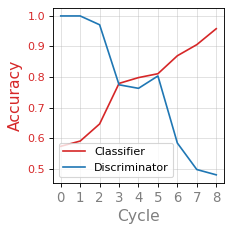

In [18]:
R.plot()

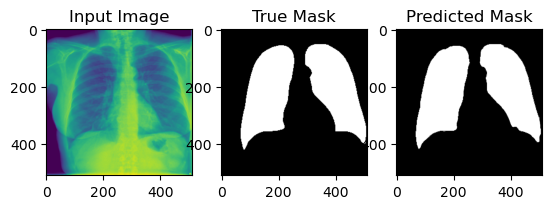

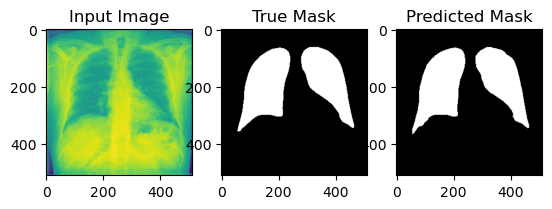

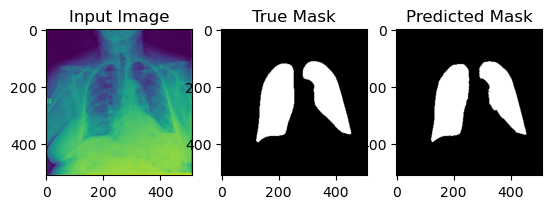

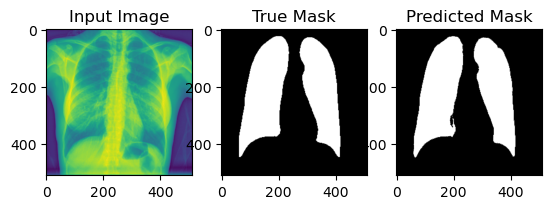

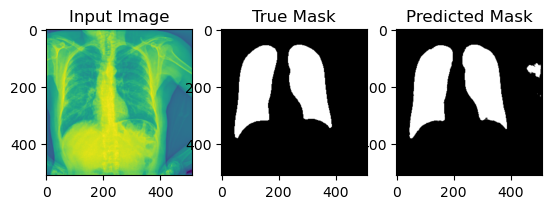

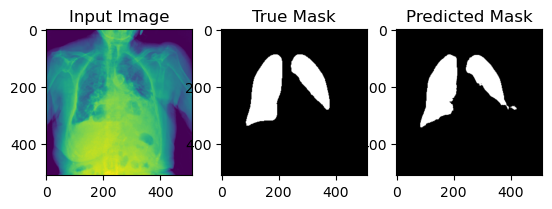

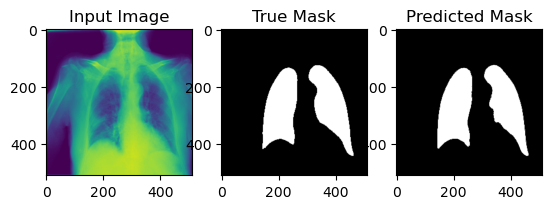

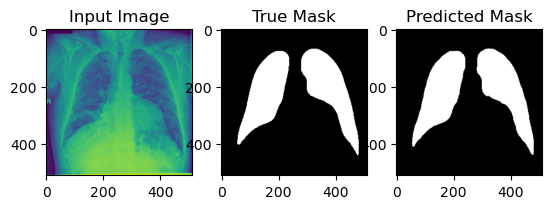

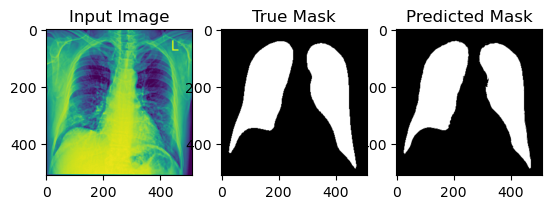

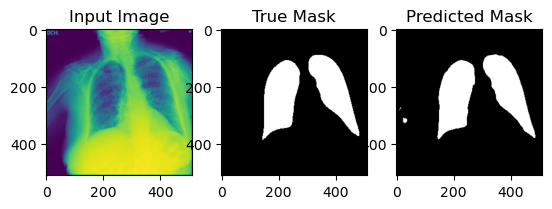

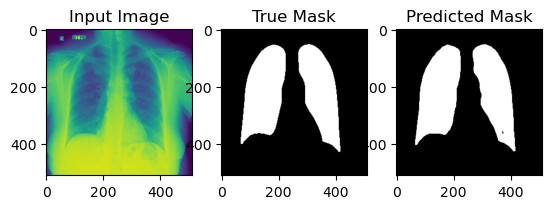

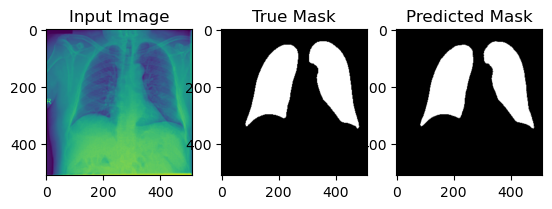

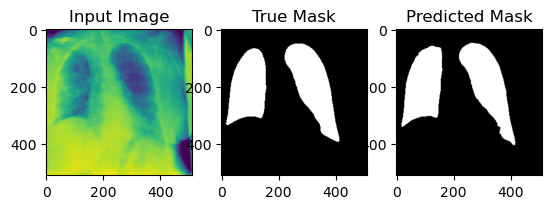

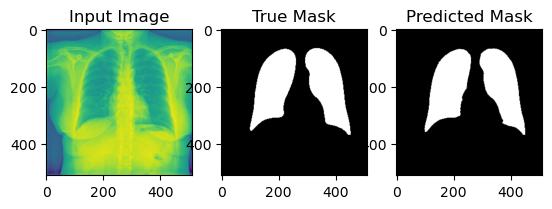

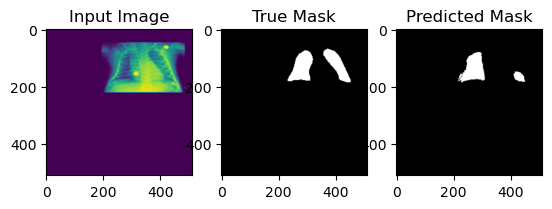

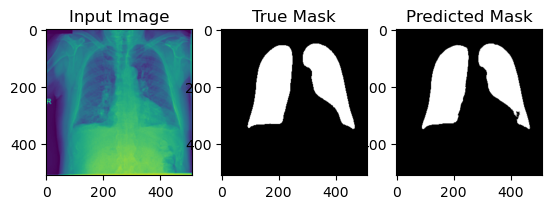

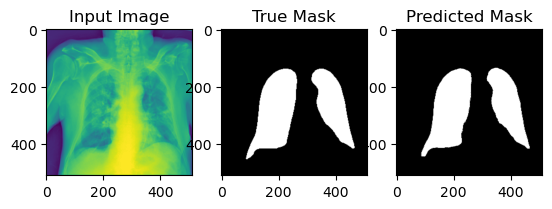

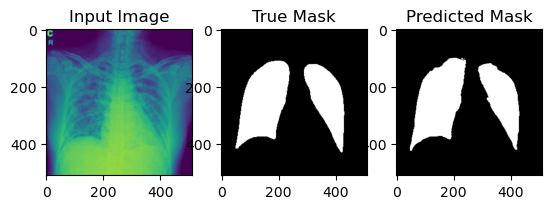

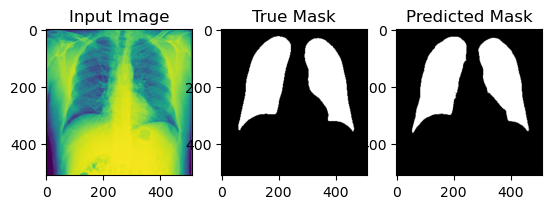

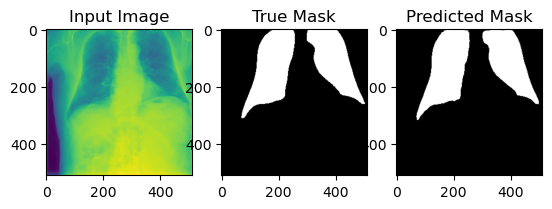

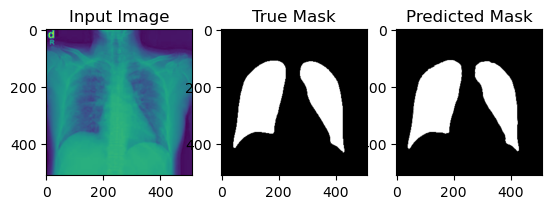

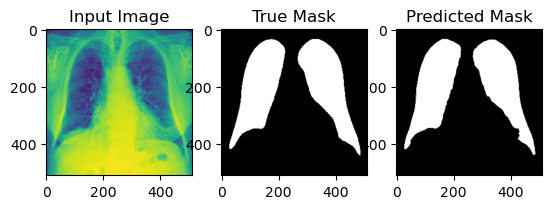

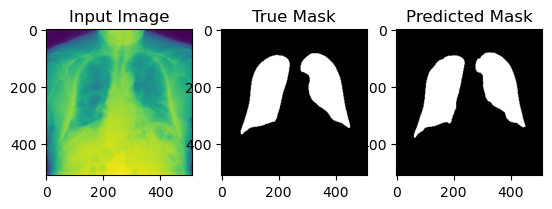

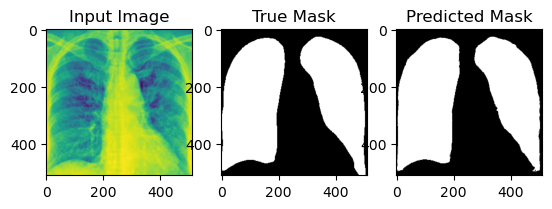

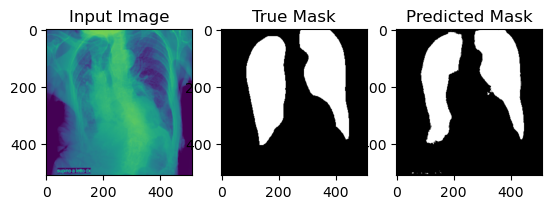

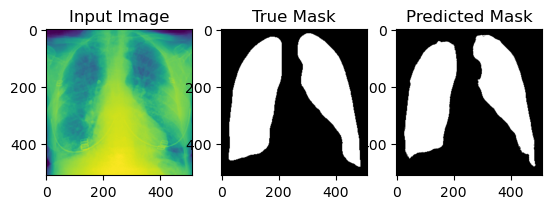

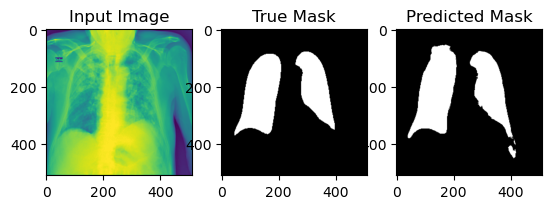

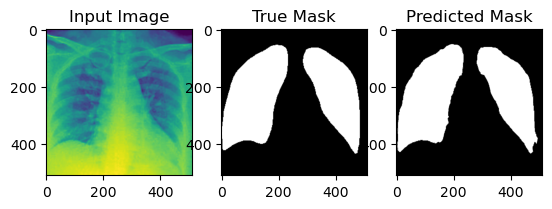

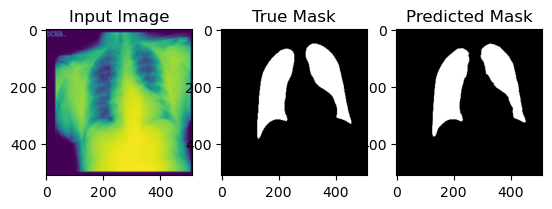

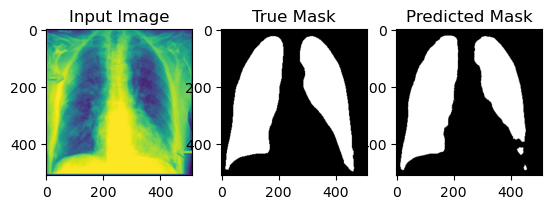

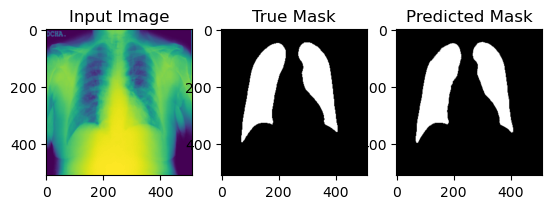

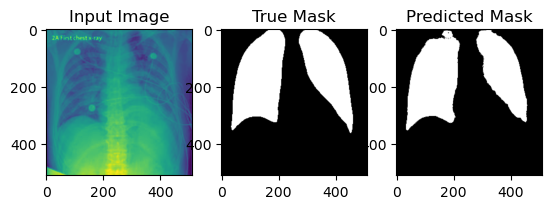

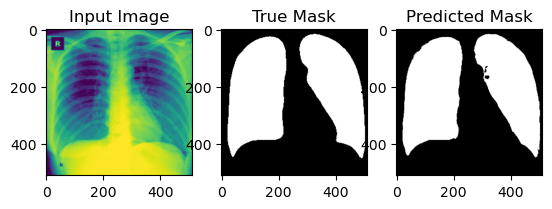

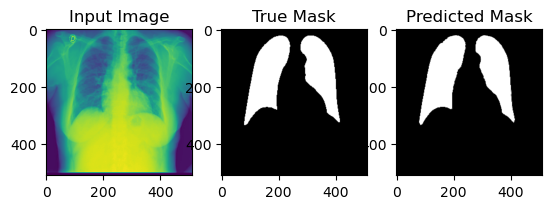

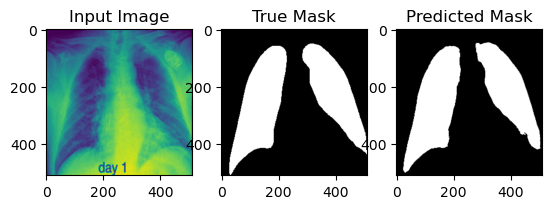

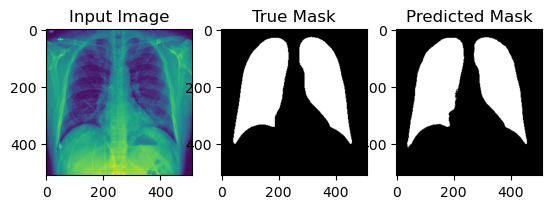

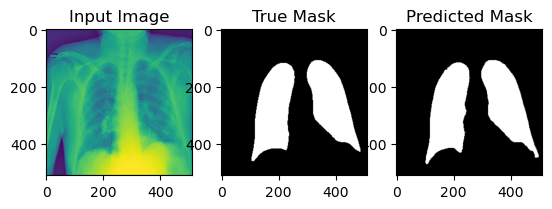

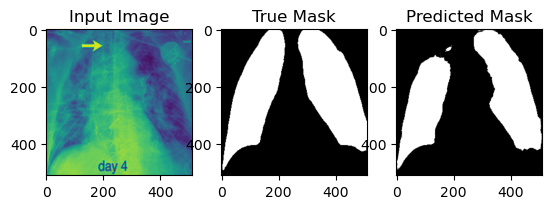

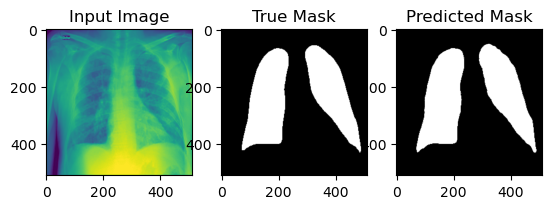

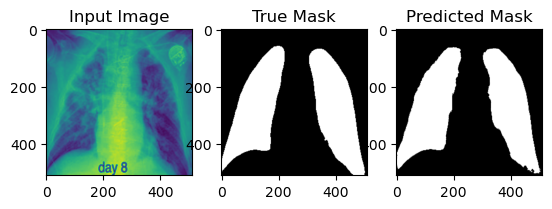

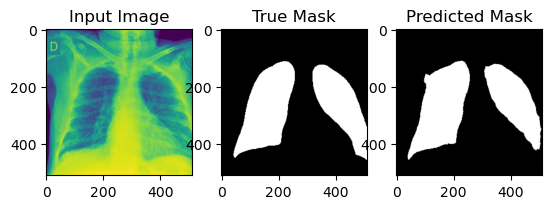

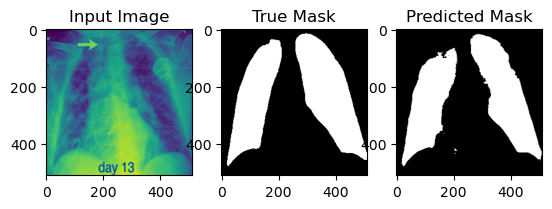

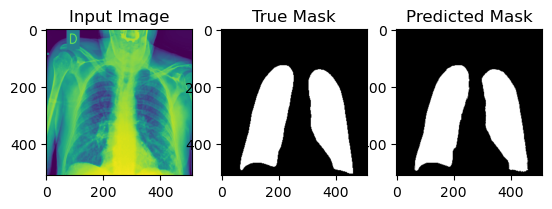

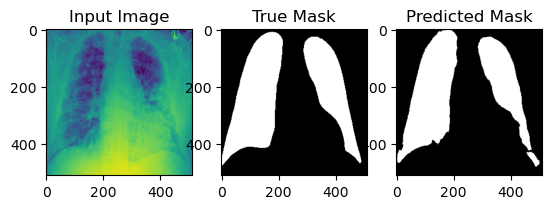

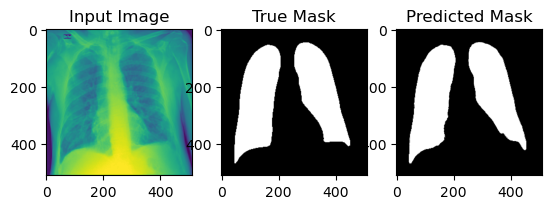

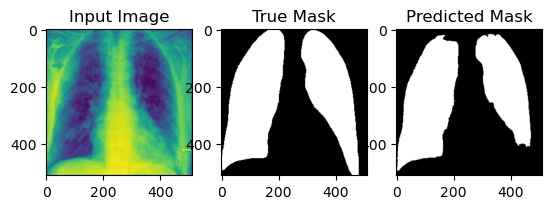

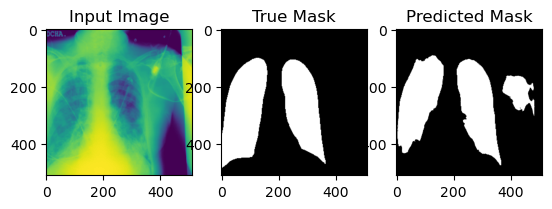

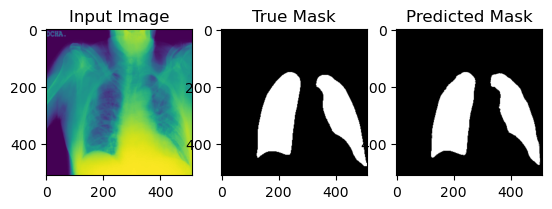

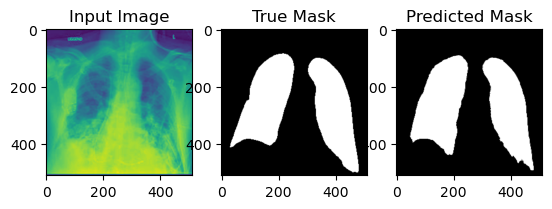

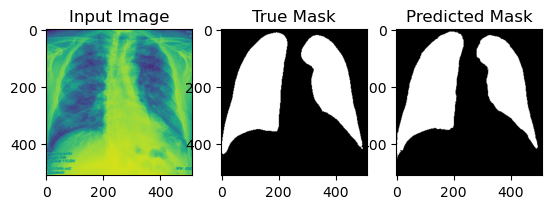

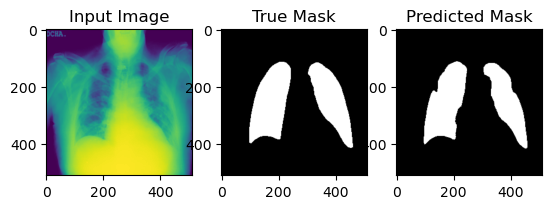

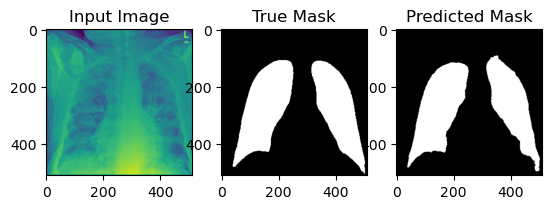

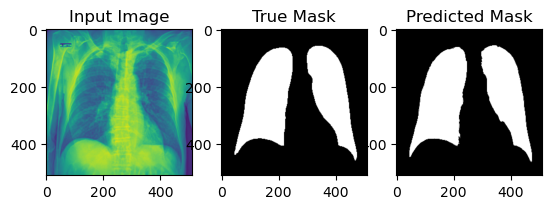

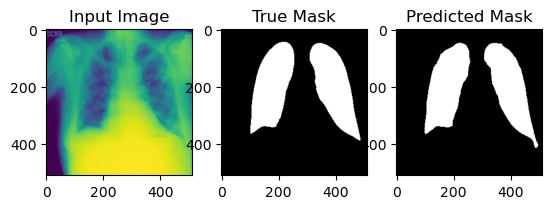

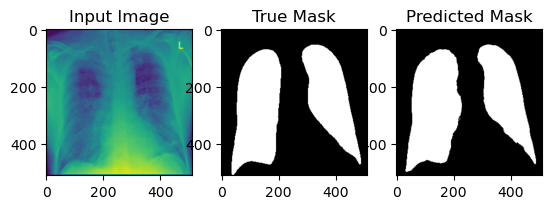

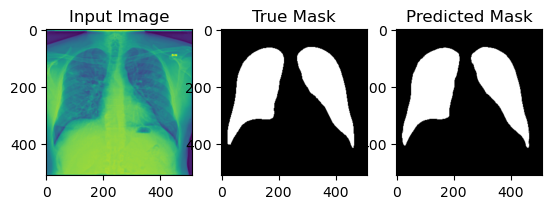

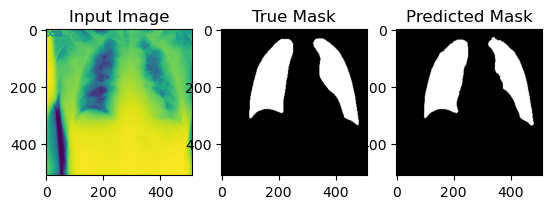

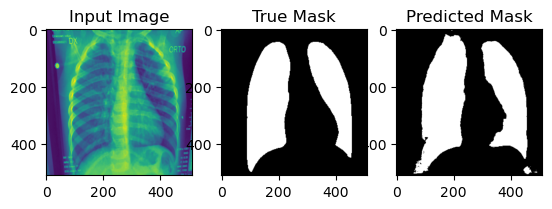

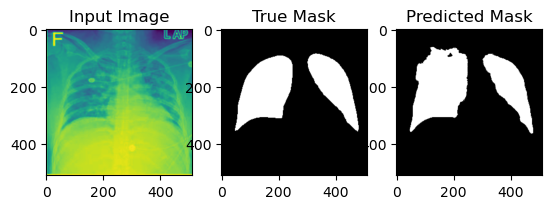

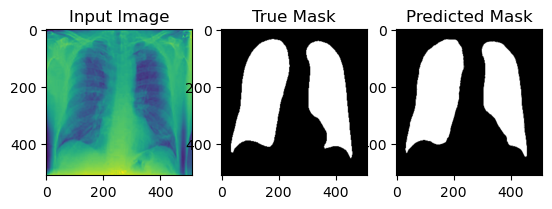

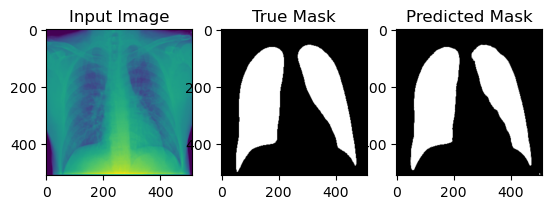

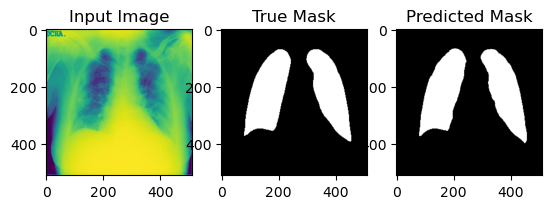

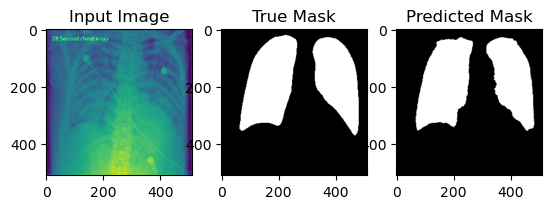

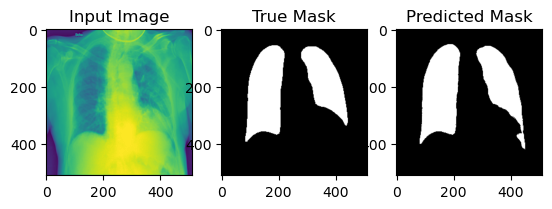

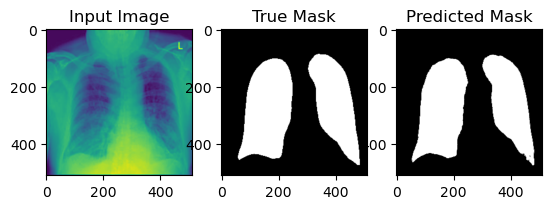

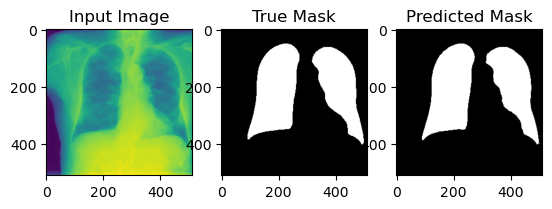

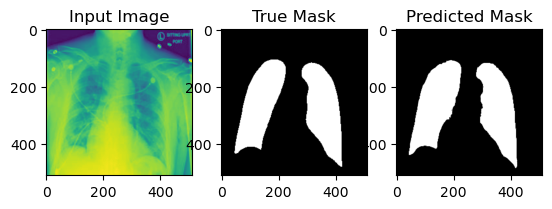

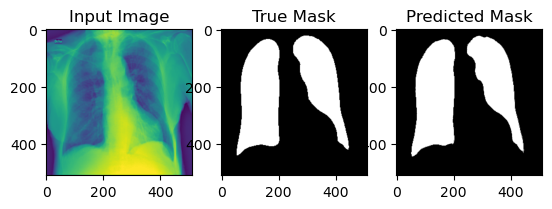

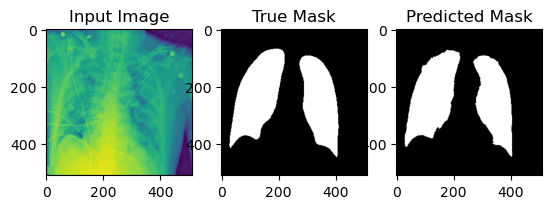

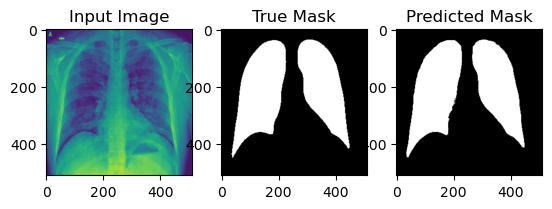

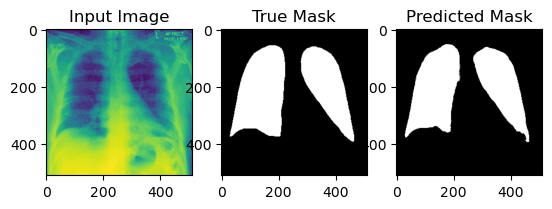

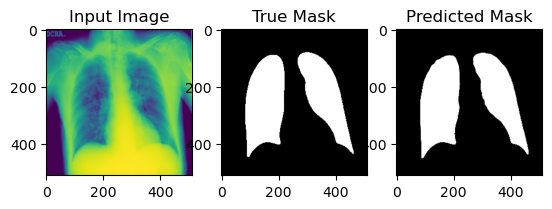

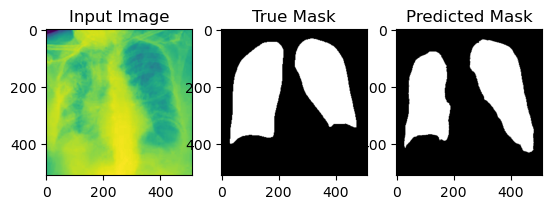

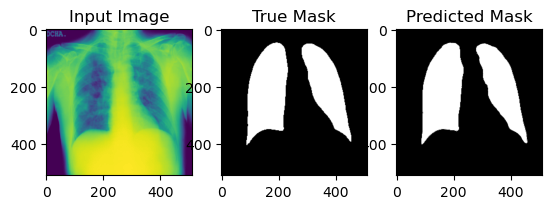

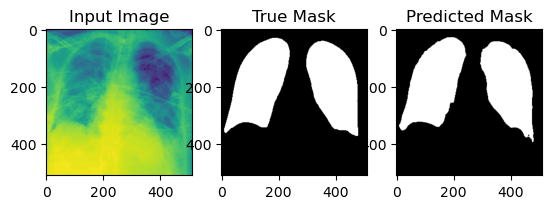

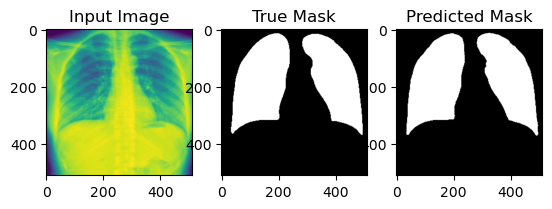

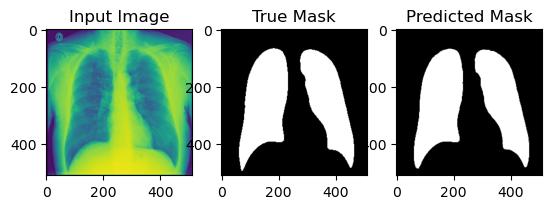

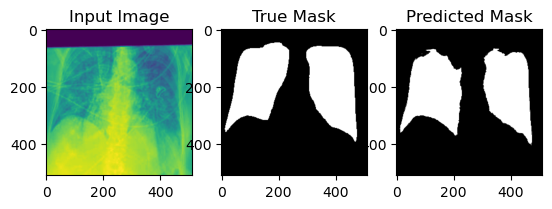

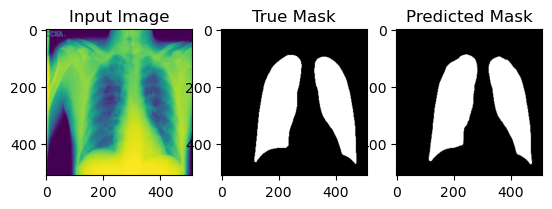

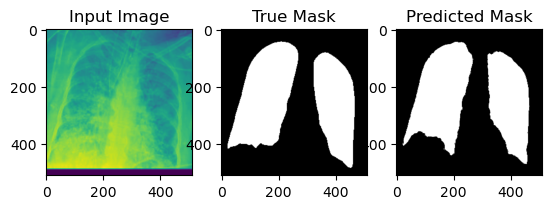

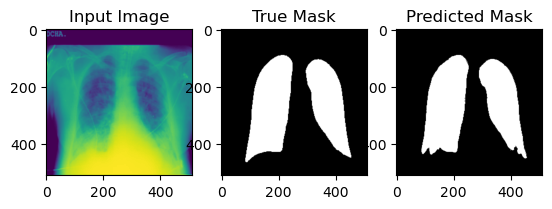

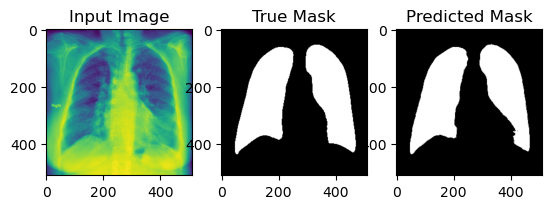

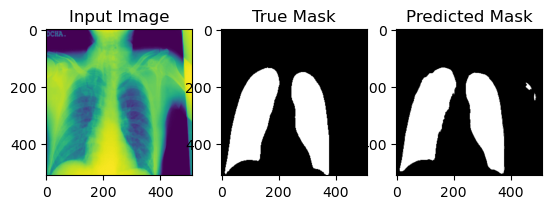

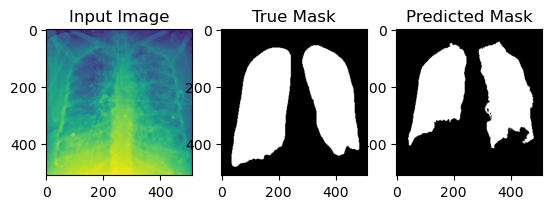

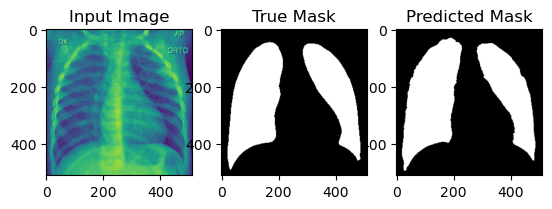

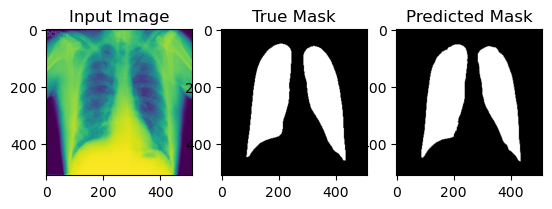

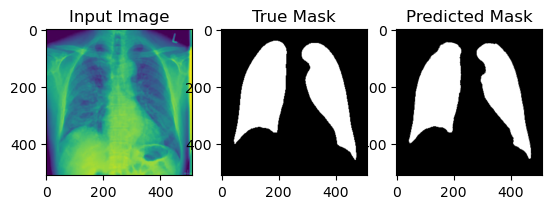

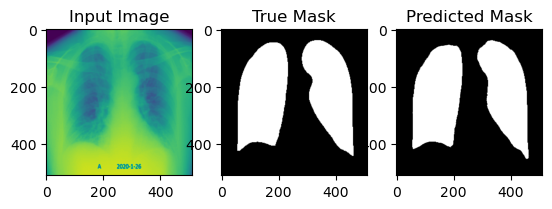

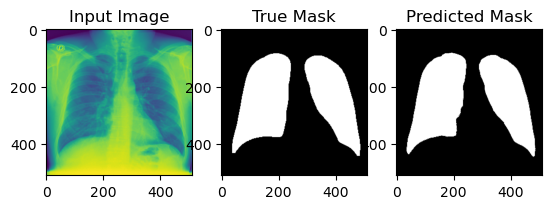

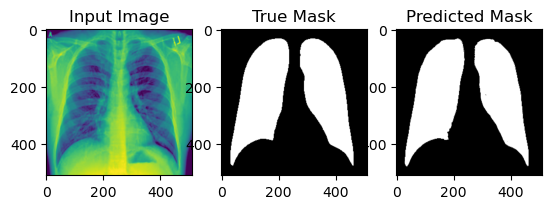

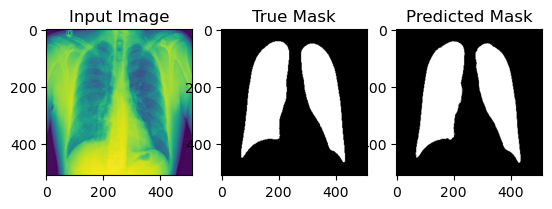

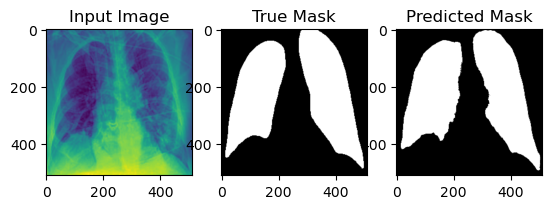

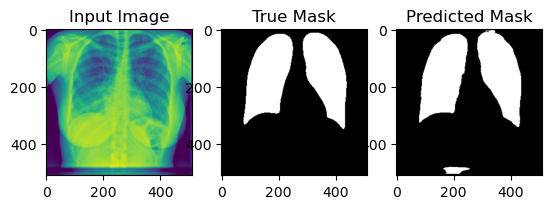

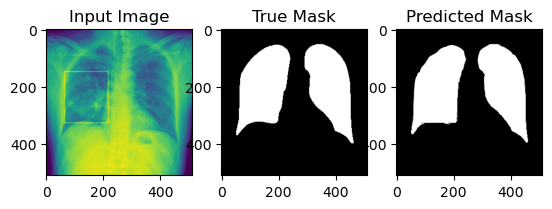

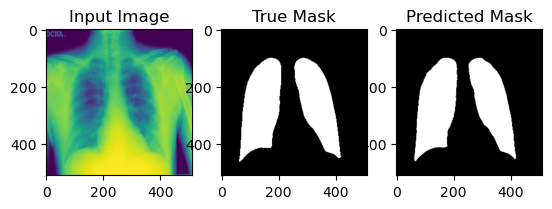

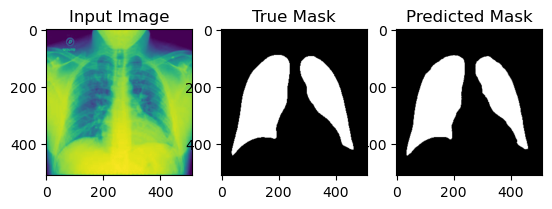

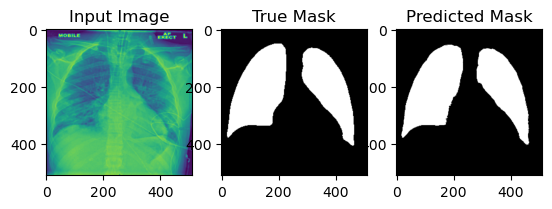

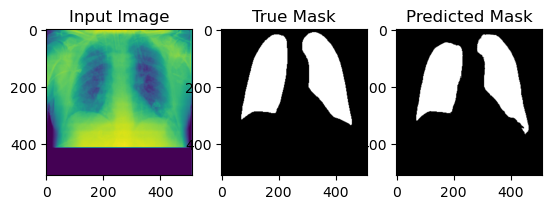

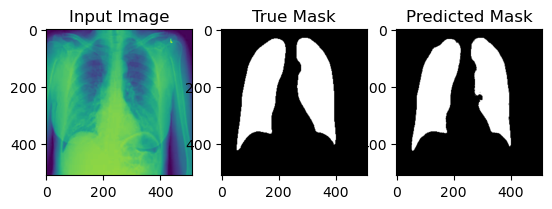

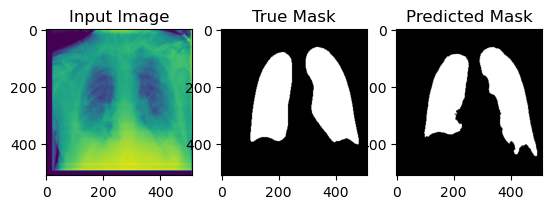

In [19]:
gp2.Util.visualize_predictions(C, X_test, y_test, num_samples=100)

In [20]:
y_pred = R.classifier.predict(X_test, y_test)

In [21]:
y_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [22]:
BareBone = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpofrf4l4wkuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpsvauyfmrkuc_unet2d


In [23]:
barebone_pred = BareBone.predict(X_test, y_test)

In [24]:
barebone_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [25]:
R.classifier.model.metrics_names

['loss', 'dice_coeff']

In [26]:
BareBone.model.metrics_names

['loss', 'dice_coeff']